# Cropping
## Testing the brightenning and darkenning effect on mtcnn
<br/>

In [57]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from torchvision import transforms
import cv2
import numpy as np
from keras_vggface.utils import decode_predictions
workers = 0 if os.name == 'nt' else 4

In [58]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


In [59]:
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

In [60]:
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

In [61]:
def collate_fn(x):
    return x[0]

dataset = datasets.ImageFolder('data/test_images')
dataset.idx_to_class = {i:c for c, i in dataset.class_to_idx.items()}
loader = DataLoader(dataset, collate_fn=collate_fn, num_workers=workers)

In [62]:
aligned = []
names = []
for x, y in loader:
    x_aligned, prob = mtcnn(x, return_prob=True)
    if x_aligned is not None:
        print('Face detected with probability: {:8f}'.format(prob))
        aligned.append(x_aligned)
        names.append(dataset.idx_to_class[y])

Face detected with probability: 0.999982
Face detected with probability: 0.999933
Face detected with probability: 0.999719
Face detected with probability: 0.999887
Face detected with probability: 0.999992


In [ ]:
trans=transforms.ToPILImage()
plt.imshow(trans(aligned[3]))

# Avengers
<br/>

In [4]:
# Import the avengers image
from PIL import Image
img = Image.open('../Avengers.jpg')

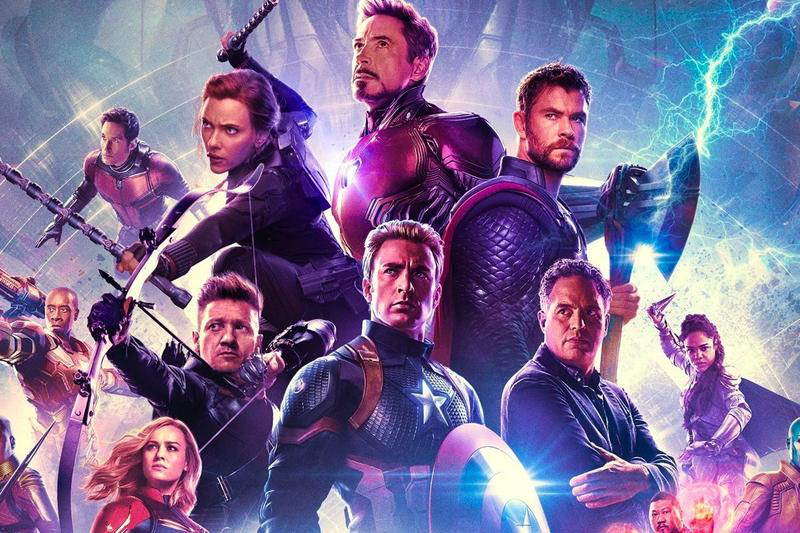

In [2]:
img

In [5]:
mtcnn = MTCNN(image_size=160, margin=0, keep_all=True)
resnet = InceptionResnetV1(pretrained='vggface2').eval()

img_cropped = mtcnn(img)
trans=transforms.ToPILImage()

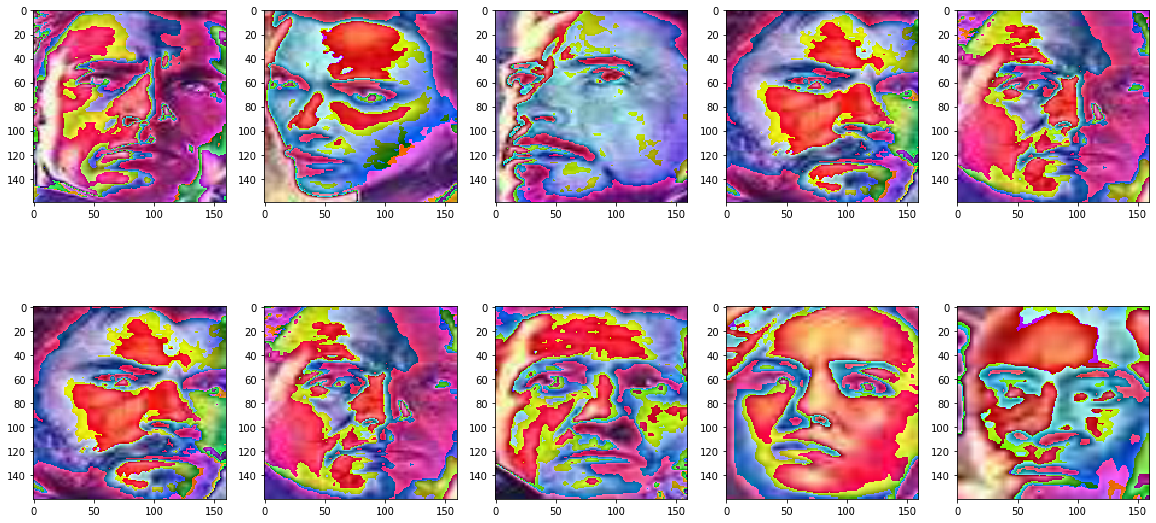

In [16]:
# Results of the MTCNN 
# face is cropped and some face feautre is extracted (abnormal colors)
plt.figure(figsize=(20,10))
for i in range(2):
    for j in range(5):
        plt.subplot2grid((2,5), (i,j))
        plt.imshow(trans(img_cropped[i*3+j]))
plt.show()

In [15]:
img_cropped.shape

torch.Size([10, 3, 160, 160])

# Brightenning Control
<br/>

In [18]:
from __future__ import print_function
import numpy as np
import cv2

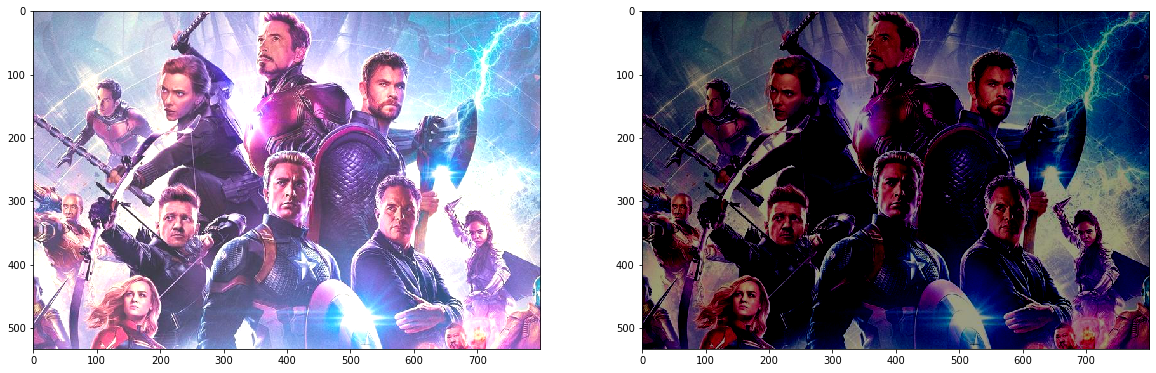

In [20]:
# Brightenning control the face extracted 

# Brightenning (brighten more 50 than original(max 255))
img_n=np.array(img)
M = np.ones(img_n.shape, dtype = "uint8") * 50
added = cv2.add(img_n, M)

# Darkenning (Darkenning more 100 than original(max 255))
M = np.ones(img_n.shape, dtype = "uint8") * 100
subtracted = cv2.subtract(img_n, M)

trans=transforms.ToPILImage()

plt.figure(figsize=(20,16))
plt.subplot(121)
plt.imshow(trans(added))
plt.subplot(122)
plt.imshow(trans(subtracted))

In [17]:
mtcnn = MTCNN(image_size=160, margin=0, keep_all=True)
resnet = InceptionResnetV1(pretrained='vggface2').eval()

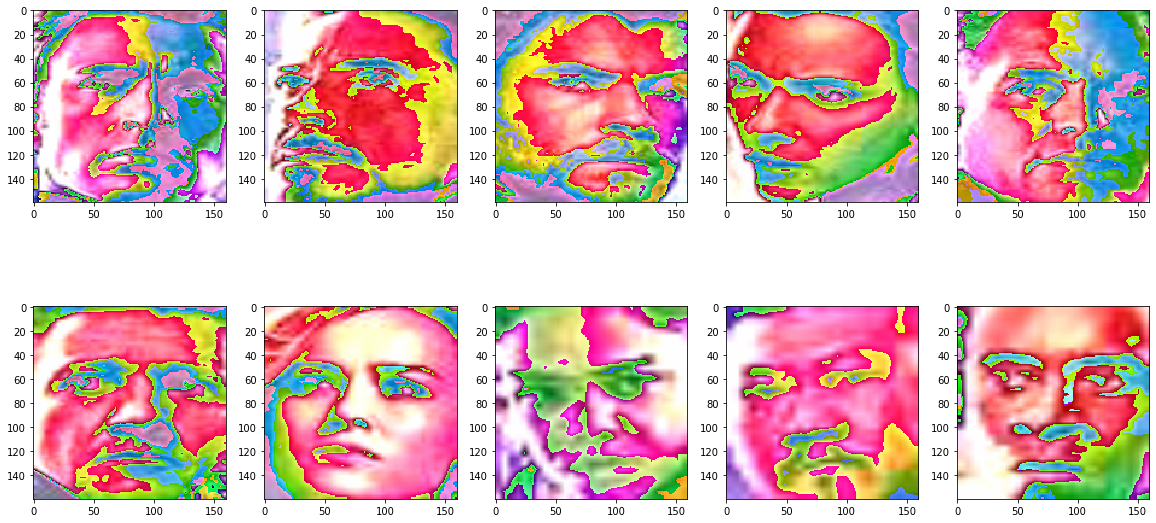

In [18]:
# Brightenned Version
img_cropped = mtcnn(trans(added))

plt.figure(figsize=(20,10))
for i in range(2):
    for j in range(5):
        plt.subplot2grid((2,5), (i,j))
        plt.imshow(trans(img_cropped[i*5+j]))
plt.show()

IndexError: index 9 is out of bounds for dimension 0 with size 9

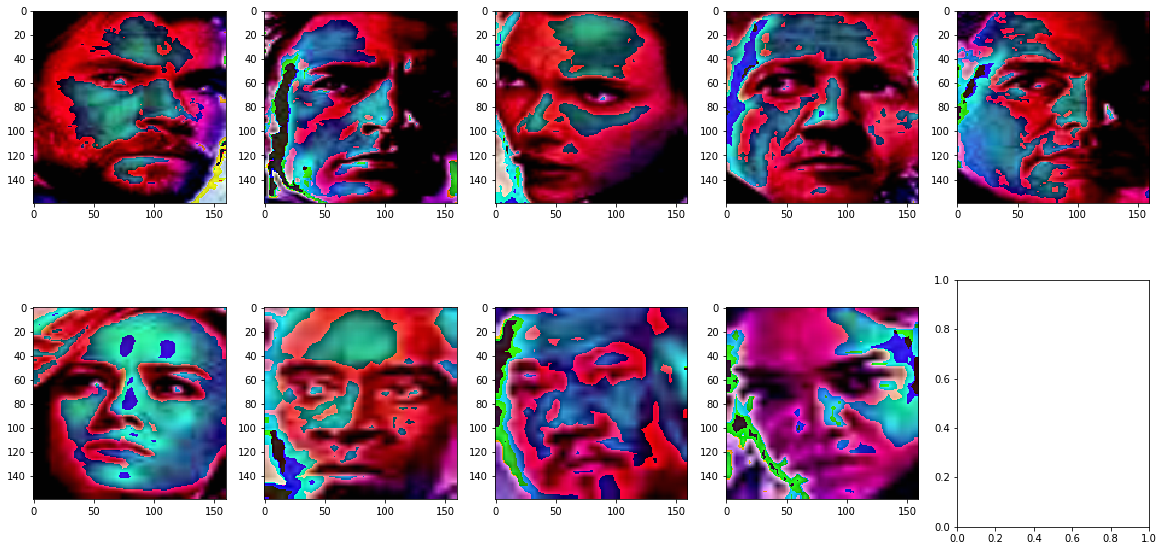

In [27]:
# Darkenned version

img_cropped = mtcnn(trans(subtracted))

plt.figure(figsize=(20,10))
for i in range(2):
    for j in range(5):
        plt.subplot2grid((2,5), (i,j))
        plt.imshow(trans(img_cropped[i*5+j]))
plt.show()

# Result
we have experimented the affects of brightenning control on MTCNN.

Our result is that adequate brightenning control don't affect the number of face detected